# Convolutional Networks: CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Initialisations

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical


Function to read images in subdirectories:

In [4]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :
     
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1)
            img = cv2.resize(img, (xdim,ydim))
            X.append(np.array(img))
            y.append(label)
            n=n+1
        print(n,' images lues')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect() # Récupération de mémoire
    return X,y, label, label_names

# Images

In [5]:
X,y,nlabels,labels = lire_images("/content/drive/MyDrive/UROP/chest_xray/chest_xray/test", 224, 224, 2000)

NORMAL
234  images lues
PNEUMONIA
390  images lues


In [6]:
labels

['NORMAL', 'PNEUMONIA']

We display images randomly:

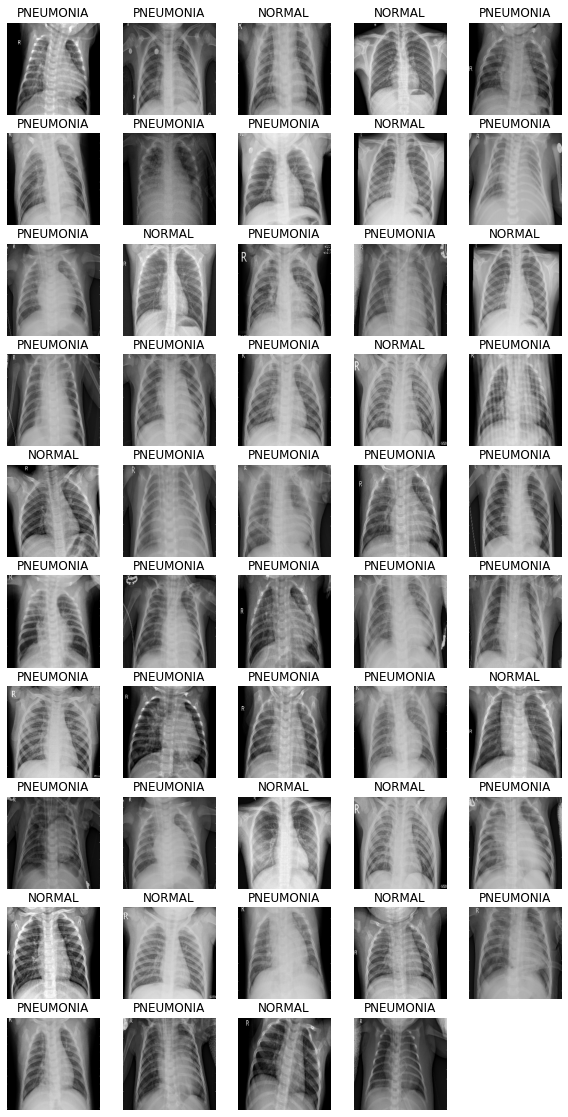

In [7]:
import random
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(labels[y[j]])


We "binarize" the target:

In [8]:
y = to_categorical(y)

In [9]:
X.shape

(624, 224, 224, 3)

In [10]:
# Normalisation entre 0 et 1
X = X / 255
print(X[0][0])

[[0.1254902  0.1254902  0.1254902 ]
 [0.14901961 0.14901961 0.14901961]
 [0.1254902  0.1254902  0.1254902 ]
 [0.12941176 0.12941176 0.12941176]
 [0.12156863 0.12156863 0.12156863]
 [0.12156863 0.12156863 0.12156863]
 [0.10588235 0.10588235 0.10588235]
 [0.1254902  0.1254902  0.1254902 ]
 [0.10980392 0.10980392 0.10980392]
 [0.11372549 0.11372549 0.11372549]
 [0.09803922 0.09803922 0.09803922]
 [0.11372549 0.11372549 0.11372549]
 [0.09019608 0.09019608 0.09019608]
 [0.10196078 0.10196078 0.10196078]
 [0.10196078 0.10196078 0.10196078]
 [0.09411765 0.09411765 0.09411765]
 [0.10196078 0.10196078 0.10196078]
 [0.09411765 0.09411765 0.09411765]
 [0.10196078 0.10196078 0.10196078]
 [0.09411765 0.09411765 0.09411765]
 [0.10588235 0.10588235 0.10588235]
 [0.10196078 0.10196078 0.10196078]
 [0.09803922 0.09803922 0.09803922]
 [0.11372549 0.11372549 0.11372549]
 [0.10980392 0.10980392 0.10980392]
 [0.10196078 0.10196078 0.10196078]
 [0.11372549 0.11372549 0.11372549]
 [0.10196078 0.10196078 0.10


We decompose into training and validation sets:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## A convolutional layer

We will use a convolutional layer for feature extraction, and a dense layer for classification:

In [12]:

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 flatten (Flatten)           (None, 1548800)           0         
                                                                 
 dense (Dense)               (None, 2)                 3097602   
                                                                 
Total params: 3,100,034
Trainable params: 3,100,034
Non-trainable params: 0
_________________________________________________________________


In [14]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

Epoch 1/50
3/3 [==============================] - 20s 6s/step - loss: 27.2848 - accuracy: 0.5241 - val_loss: 0.6532 - val_accuracy: 0.6032
Epoch 2/50
3/3 [==============================] - 26s 10s/step - loss: 4.2294 - accuracy: 0.5027 - val_loss: 2.3626 - val_accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 17s 6s/step - loss: 2.8349 - accuracy: 0.6203 - val_loss: 0.3596 - val_accuracy: 0.8730
Epoch 4/50
3/3 [==============================] - 17s 6s/step - loss: 2.7945 - accuracy: 0.5633 - val_loss: 0.8908 - val_accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 17s 6s/step - loss: 0.7084 - accuracy: 0.7219 - val_loss: 0.3767 - val_accuracy: 0.8889
Epoch 6/50
3/3 [==============================] - 17s 6s/step - loss: 0.2128 - accuracy: 0.9287 - val_loss: 0.3075 - val_accuracy: 0.8889
Epoch 7/50
3/3 [==============================] - 17s 6s/step - loss: 0.1735 - accuracy: 0.9519 - val_loss: 0.2905 - val_accuracy: 0.8730
Epoch 8/50
3/3 [================

In [15]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 92.06%


We define a function to display a graph of the scores:

In [16]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

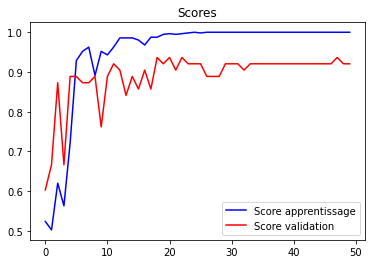

In [17]:
plot_scores(train)

In [18]:
y_cnn = np.argmax(model.predict(X_test), axis=1)

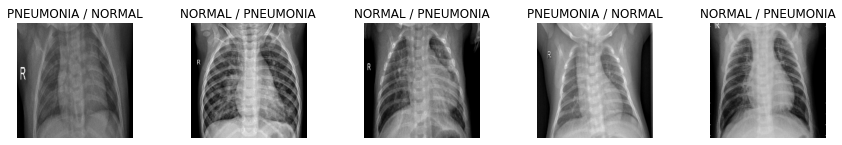

In [19]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (labels[y_cnn[j]], labels[y_test[j].argmax(axis=-1)]))
        i+=1

We display 50 images where the algorithm made a mistake:

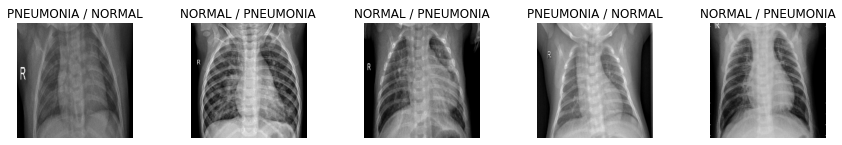

In [20]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (labels[y_cnn[j]], labels[y_test[j].argmax(axis=-1)]))
        i+=1

## Deeper CNN Model


We test a model with two convolutional layers:

In [21]:

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(20, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(20, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

# Compilation du modèle
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 20)      5780      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 20)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 20)       

In [23]:
train = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=1)

Epoch 1/50
3/3 [==============================] - 31s 10s/step - loss: 1.0343 - accuracy: 0.5882 - val_loss: 0.6936 - val_accuracy: 0.4444
Epoch 2/50
3/3 [==============================] - 29s 9s/step - loss: 0.7755 - accuracy: 0.3957 - val_loss: 0.6778 - val_accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 28s 9s/step - loss: 0.6878 - accuracy: 0.5775 - val_loss: 0.6330 - val_accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 28s 9s/step - loss: 0.6866 - accuracy: 0.6203 - val_loss: 0.6305 - val_accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 28s 9s/step - loss: 0.6506 - accuracy: 0.6203 - val_loss: 0.6473 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 29s 9s/step - loss: 0.6460 - accuracy: 0.6988 - val_loss: 0.6651 - val_accuracy: 0.6667
Epoch 7/50
3/3 [==============================] - 28s 9s/step - loss: 0.6443 - accuracy: 0.7843 - val_loss: 0.6544 - val_accuracy: 0.6667
Epoch 8/50
3/3 [=================

In [24]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 88.89%


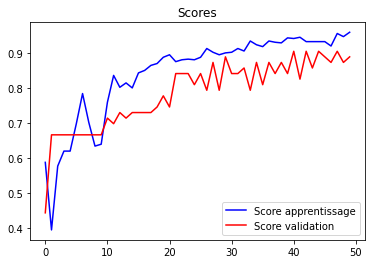

In [25]:
plot_scores(train)

In [26]:
predict_y = model2.predict(X_test) 
y_cnn = np.argmax(predict_y, axis=1)

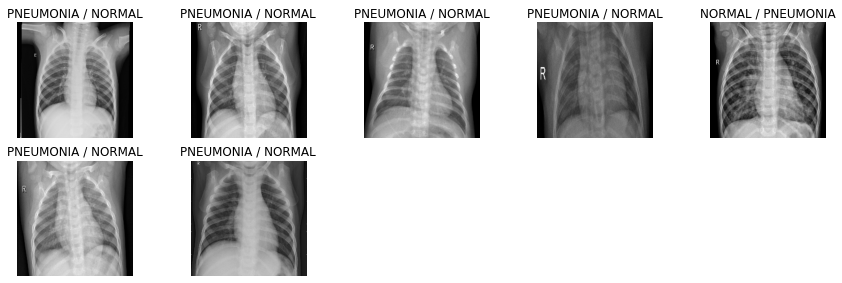

In [27]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j].argmax(axis=-1)) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (labels[y_cnn[j]], labels[y_test[j].argmax(axis=-1)]))
        i+=1


The trained model can be saved:





In [28]:
model2.save('chest_cnn2.h5')

You can then use the model without starting the training again:

In [29]:
new_model = load_model('chest_cnn2.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 20)      5780      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 20)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 20)       

In [30]:
scores = new_model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 88.89%
